In [141]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
day_df = pd.read_csv("day.csv")

In [143]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [144]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [145]:
day_df.shape

(730, 16)

In [146]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [147]:
## Dropping instant column - we already have index provided by pandas and also it doesn't help us in prediction.
day_df = day_df.drop("instant", axis=1)

In [148]:
## Dropping the date column since we have day, month, year information
day_df = day_df.drop("dteday", axis=1)

In [149]:
## Removing casual and registered columns since the target variable (cnt) is a derivative (addition) of these 2 columns
day_df = day_df.drop("casual", axis=1)

In [150]:
day_df = day_df.drop("registered", axis=1)

In [151]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [152]:
day_df.shape

(730, 12)

### Plotting relationship with target variable and predictors to see correlation

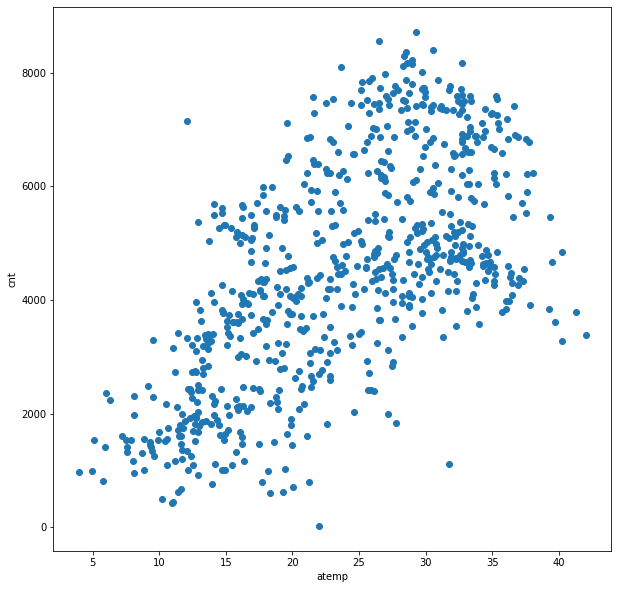

In [153]:
plt.figure(figsize=(10, 10))
plt.scatter(day_df.atemp, day_df.cnt)
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.show()

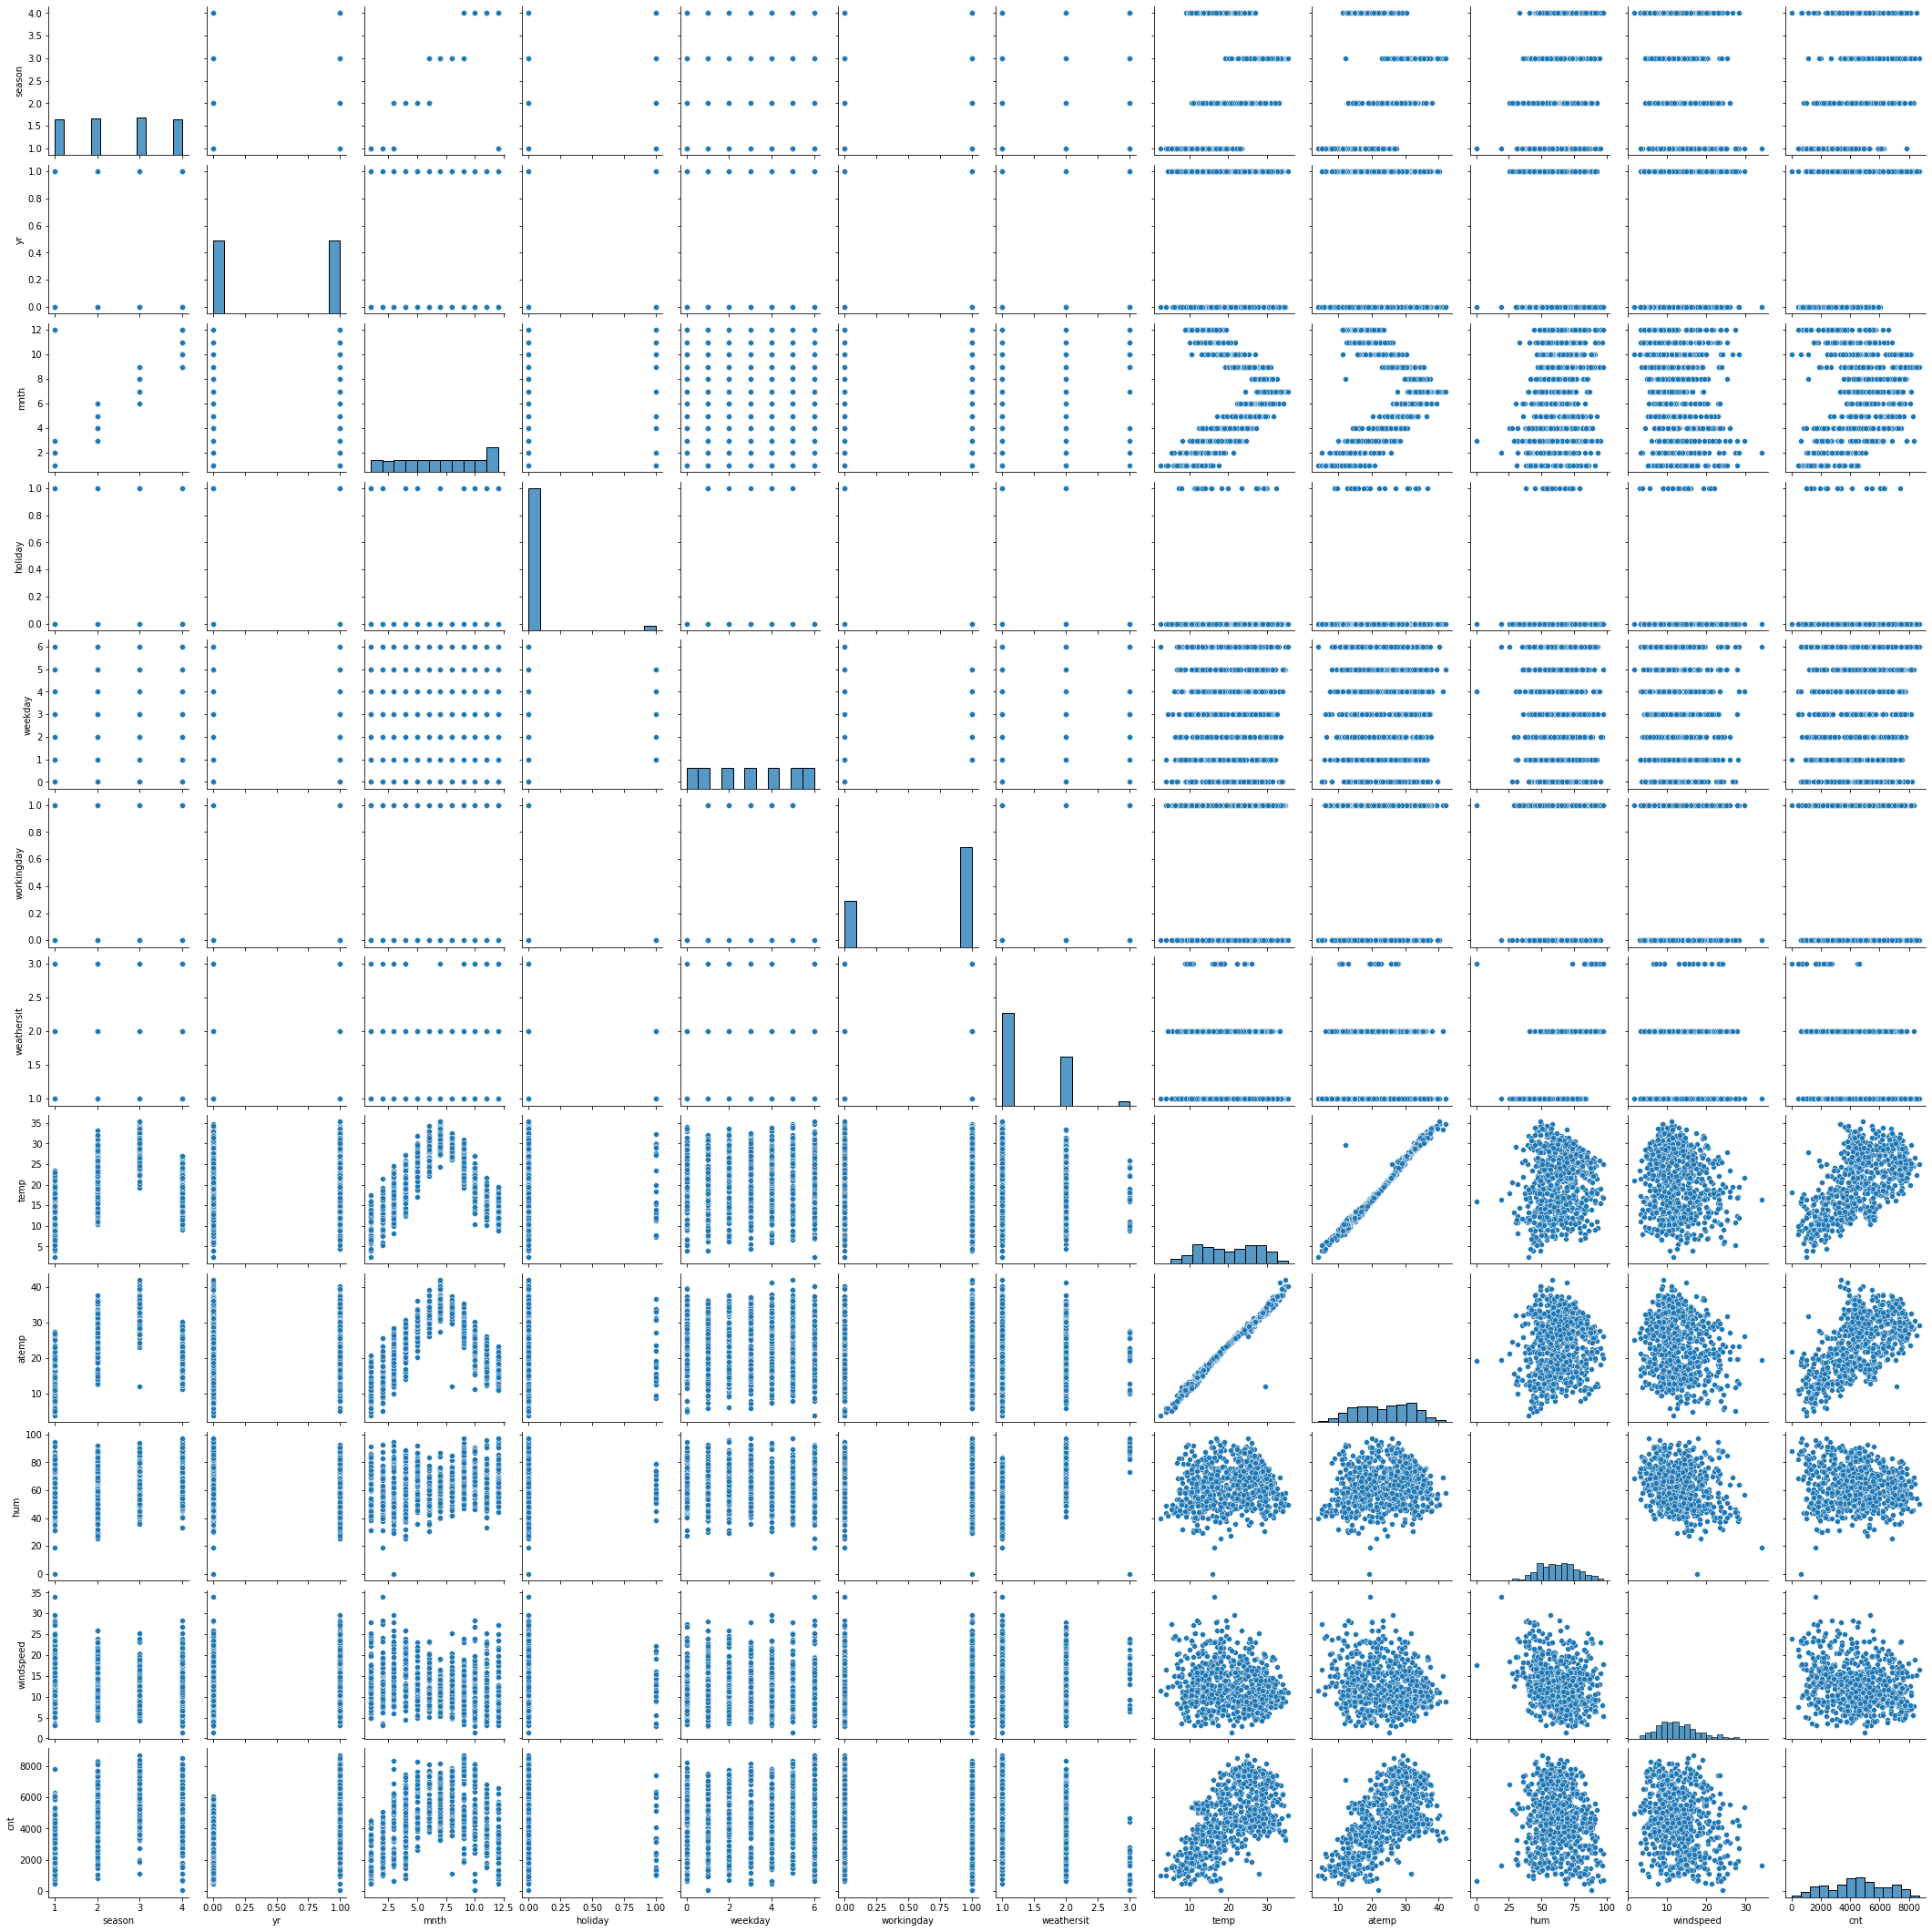

In [154]:
sns.pairplot(day_df)
plt.show()

In [155]:
## Since temp and atemp are highly correlated, I am removing temp from the dataset
day_df = day_df.drop("temp", axis=1)

### Visualizing categorical values

1. season
2. yr
3. holiday
4. workingday
5. weekday
6. weathersit
7. mnth

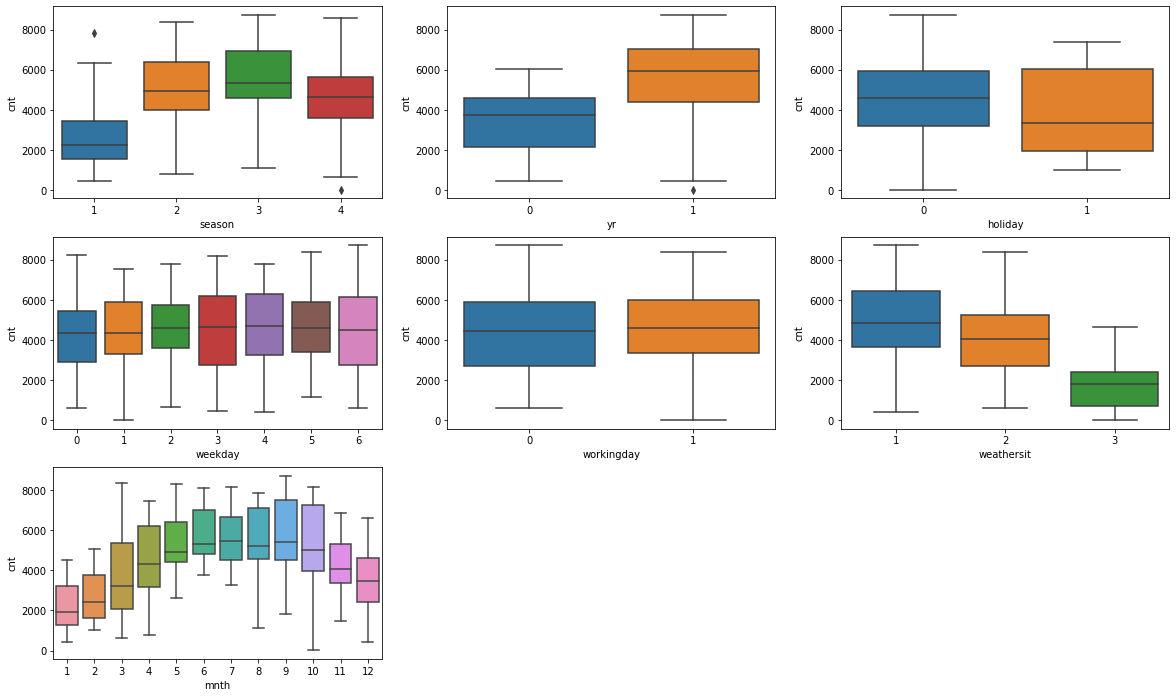

In [156]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1)
sns.boxplot(x="season", y="cnt", data=day_df)

plt.subplot(3, 3, 2)
sns.boxplot(x="yr", y="cnt", data=day_df)

plt.subplot(3, 3, 3)
sns.boxplot(x="holiday", y="cnt", data=day_df)

plt.subplot(3, 3, 4)
sns.boxplot(x="weekday", y="cnt", data=day_df)

plt.subplot(3, 3, 5)
sns.boxplot(x="workingday", y="cnt", data=day_df)

plt.subplot(3, 3, 6)
sns.boxplot(x="weathersit", y="cnt", data=day_df)

plt.subplot(3, 3, 7)
sns.boxplot(x="mnth", y="cnt", data=day_df)

plt.show()

### Preparing Data

### Encodings
1. Converting binary variables to 1/0
2. Converting categorical variables to dummy variables

In [157]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [158]:
day_df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801


In [159]:
# Binary categories list
binary_categorical_var_list = ["yr", "workingday", "holiday"]

In [160]:
# listing unique values of the above columns to make sure that they are binary
print("yr unique counts are :\n", day_df.yr.value_counts())

print("\n workingday unique counts are :\n", day_df.workingday.value_counts())

print("\n holiday unique counts are :\n", day_df.holiday.value_counts())

yr unique counts are :
 0    365
1    365
Name: yr, dtype: int64

 workingday unique counts are :
 1    499
0    231
Name: workingday, dtype: int64

 holiday unique counts are :
 0    709
1     21
Name: holiday, dtype: int64


### Categorical Data with multiple categories
To create dummy variables:
1. season
2. mnth
3. weekday
4. weathersit

In [161]:
day_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [162]:
seasons = pd.get_dummies(day_df.season, drop_first=True)
seasons = seasons.rename(columns={2:"summer", 3:"fall", 4:"winter"})
seasons

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [163]:
day_df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [164]:
months = pd.get_dummies(day_df.mnth, drop_first=True)
months = months.rename(columns={2:"feb", 3: "mar", 4: "apr", 5:"may", 6:"jun", 7:"jul", 8:"aug",
                                 9:"sep", 10:"oct", 11:"nov", 12:"dec"})
months

,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [165]:
day_df.weekday.value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [166]:
weekday = pd.get_dummies(day_df.weekday, drop_first=True)
weekday = weekday.rename(columns={1:"mon", 2: "tue", 3: "wed", 4:"thur", 5:"fri", 6:"sat"})
weekday

,mon,tue,wed,thur,fri,sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


In [167]:
day_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [168]:
weather = pd.get_dummies(day_df.weathersit, drop_first=True)
weather = weather.rename(columns={2:"misty+cloudy", 3: "light snow, rain", 4: "heavy rain/snow"})
weather

,misty+cloudy,"light snow, rain"
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [169]:
day_df = pd.concat([day_df, seasons], axis=1)
day_df = day_df.drop("season", axis=1)
day_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,0,0,0


In [170]:
day_df = pd.concat([day_df, months], axis=1)
day_df = day_df.drop("mnth", axis=1)
day_df.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,summer,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,6,0,2,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
day_df = pd.concat([day_df, weekday], axis=1)
day_df = day_df.drop("weekday", axis=1)
day_df.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,summer,fall,...,sep,oct,nov,dec,mon,tue,wed,thur,fri,sat
0,0,0,0,2,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [172]:
day_df = pd.concat([day_df, weather], axis=1)
day_df = day_df.drop("weathersit", axis=1)
day_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,misty+cloudy,"light snow, rain"
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Dataset split and rescaling features

#### Splitting into train and test

In [173]:
import sklearn
from sklearn.model_selection import train_test_split

In [174]:
df_train, df_test = train_test_split(day_df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling features
Rescaling columns such as atemp, hum, windspeed

In [175]:
from sklearn.preprocessing import MinMaxScaler

In [176]:
# Instantiate the object
scaler = MinMaxScaler()

# list of variables that need to be normalized:
num_vars = ["atemp", "hum", "windspeed"]

# fit and transform on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,misty+cloudy,"light snow, rain"
576,1,0,1,0.766351,0.725633,0.264686,7216,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,1796,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.318819,0.751824,0.380981,1683,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Training the model

#### How many variables to include for prediction?
#### How to filter the variables?

#### We will first start with one varible and start adding

In [177]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,misty+cloudy,"light snow, rain"
576,1,0,1,0.766351,0.725633,0.264686,7216,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,1796,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.318819,0.751824,0.380981,1683,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [178]:
y_train = df_train.pop("cnt")
X_train = df_train

In [179]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,summer,fall,winter,feb,...,nov,dec,mon,tue,wed,thur,fri,sat,misty+cloudy,"light snow, rain"
576,1,0,1,0.766351,0.725633,0.264686,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.318819,0.751824,0.380981,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [180]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [181]:
import statsmodels.api as sm

### Adding first variable - atemp

In [182]:
# add a constant
X_train_sm = sm.add_constant(X_train["atemp"])

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const    1431.848840
atemp    5950.404439
dtype: float64

In [183]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           4.77e-62
Time:                        23:28:13   Log-Likelihood:                -4448.0
No. Observations:                 510   AIC:                             8900.
Df Residuals:                     508   BIC:                             8909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1431.8488    172.338      8.308      0.000    1093.265    1770.433
atemp       5950.4044    310.351     19.173      0.000    5340.674    6560.135
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding 2nd variable - humidity

In [184]:
# add a constant
X_train_sm = sm.add_constant(X_train[["atemp", "hum"]])

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const    2802.784236
atemp    6220.209247
hum     -2320.420115
dtype: float64

In [185]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     206.6
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           2.34e-66
Time:                        23:28:13   Log-Likelihood:                -4434.9
No. Observations:                 510   AIC:                             8876.
Df Residuals:                     507   BIC:                             8888.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2802.7842    313.233      8.948      0.000    2187.389    3418.180
atemp       6220.2092    307.165     20.250      0.000    5616.736    6823.682
hum        -2320.4201    447.353     -5.187      0.000   -3199.314   -1441.526
==============================================================================
Omnibus:                        1.021   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.091
Skew:                           0.058   Prob(JB):                        0.579
Kurtosis:                       2.806   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding 3rd variable - windspeed

In [186]:
# add a constant
X_train_sm = sm.add_constant(X_train[["atemp", "hum", "windspeed"]])

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const        3927.163707
atemp        5945.628763
hum         -2863.508250
windspeed   -1963.981297
dtype: float64

In [187]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     152.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           1.67e-70
Time:                        23:28:13   Log-Likelihood:                -4422.4
No. Observations:                 510   AIC:                             8853.
Df Residuals:                     506   BIC:                             8870.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3927.1637    378.829     10.367      0.000    3182.892    4671.436
atemp       5945.6288    304.965     19.496      0.000    5346.475    6544.782
hum        -2863.5083    450.108     -6.362      0.000   -3747.819   -1979.198
windspeed  -1963.9813    390.153     -5.034      0.000   -2730.501   -1197.462
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.360
Skew:                           0.091   Prob(JB):                        0.507
Kurtosis:                       2.824   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:
1. We can see that the adjusted R-square value was 0.419 when only 1 variable (atemp) was used for prediction
2. Adjusted R-square value went up when 2nd variable (hum) was added - 0.447
3. Adding 3rd variable (windspeed) slightly boosted the value to 0.472

Since we have ~29 variables it becomes cumbersome to manually add predictor variables one by one.
In the following section we will use all the variables for prediction and eliminate the variables that are not required



### We will fit the model with all variables

In [188]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sep', 'oct', 'nov', 'dec', 'mon', 'tue', 'wed', 'thur', 'fri', 'sat',
       'misty+cloudy', 'light snow, rain'],
      dtype='object')

In [189]:
# add a constant
X_train_sm = sm.add_constant(X_train)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const               1548.337691
yr                  2037.303509
holiday             -311.462603
workingday           376.950062
atemp               3616.256012
hum                -1268.215749
windspeed          -1463.130115
summer               753.925257
fall                 451.303701
winter              1333.590077
feb                  288.462934
mar                  636.336755
apr                  639.327804
may                  954.587841
jun                  849.966914
jul                  511.622003
aug                 1003.339024
sep                 1470.779426
oct                  705.440283
nov                  242.031233
dec                  181.986864
mon                  -95.506740
tue                  -52.950135
wed                   61.750177
thur                  19.240088
fri                  132.954069
sat                  472.825346
misty+cloudy        -531.667392
light snow, rain   -2199.146839
dtype: float64

In [190]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.07e-179
Time:                        23:28:13   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1548.3377    266.483      5.810      0.000    1024.727    2071.949
yr                2037.3035     70.413     28.934      0.000    1898.949    2175.658
holiday           -311.4626    206.370     -1.509      0.132    -716.958      94.033
workingday         376.9501     82.044      4.594      0.000     215.742     538.158
atemp             3616.2560    394.193      9.174      0.000    2841.707    4390.805
hum              -1268.2157    337.214     -3.761      0.000   -1930.808    -605.624
windspeed        -1463.1301    225.499     -6.488      0.000   -1906.212   -1020.048
summer             753.9253    206.721      3.647      0.000     347.740    1160.111
fall               451.3037    261.814      1.724      0.085     -63.135     965.742
winter            1333.5901    227.339      5.866      0.000     886.893    1780.287
feb                288.4629    180.512      1.598      0.111     -66.225     643.151
mar                636.3368    193.930      3.281      0.001     255.284    1017.390
apr                639.3278    292.217      2.188      0.029      65.150    1213.505
may                954.5878    309.593      3.083      0.002     346.268    1562.907
jun                849.9669    327.548      2.595      0.010     206.369    1493.565
jul                511.6220    373.335      1.370      0.171    -221.944    1245.188
aug               1003.3390    353.444      2.839      0.005     308.858    1697.820
sep               1470.7794    321.285      4.578      0.000     839.488    2102.071
oct                705.4403    300.183      2.350      0.019     115.612    1295.268
nov                242.0312    287.236      0.843      0.400    -322.358     806.421
dec                181.9869    231.997      0.784      0.433    -273.863     637.837
mon                -95.5067     85.166     -1.121      0.263    -262.848      71.835
tue                -52.9501     97.687     -0.542      0.588    -244.896     138.995
wed                 61.7502     92.008      0.671      0.502    -119.035     242.536
thur                19.2401     95.703      0.201      0.841    -168.806     207.286
fri                132.9541     97.547      1.363      0.174     -58.716     324.625
sat                472.8253    127.229      3.716      0.000     222.834     722.817
misty+cloudy      -531.6674     91.194     -5.830      0.000    -710.854    -352.481
light snow, rain -2199.1468    231.571     -9.497      0.000   -2654.160   -1744.133
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. N

#### Significance of Variables
1. p-values
2. VIF

Based on metrics obtained, we will decide which columns to drop

Order of dropping:
1. Columns with high p-value will be dropped first
2. High p-value, low VIF will be dropped second
3. Low p-value, high VIF will be dropped last

Columns with low VIF and low p-value will be retained


In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [192]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
23,thur,inf
24,fri,inf
2,workingday,inf
22,wed,inf
21,tue,inf
20,mon,inf
1,holiday,inf
3,atemp,40.23
4,hum,20.67
7,fall,15.27


In [193]:
## Dropping "thur" column since it has high p-value and high VIF
X = X_train.drop("thur", axis=1)

In [194]:
# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const               1548.337691
yr                  2037.303509
holiday             -292.222514
workingday           396.190150
atemp               3616.256012
hum                -1268.215749
windspeed          -1463.130115
summer               753.925257
fall                 451.303701
winter              1333.590077
feb                  288.462934
mar                  636.336755
apr                  639.327804
may                  954.587841
jun                  849.966914
jul                  511.622003
aug                 1003.339024
sep                 1470.779426
oct                  705.440283
nov                  242.031233
dec                  181.986864
mon                 -114.746828
tue                  -72.190223
wed                   42.510088
fri                  113.713981
sat                  472.825346
misty+cloudy        -531.667392
light snow, rain   -2199.146839
dtype: float64

In [195]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.07e-179
Time:                        23:28:13   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1548.3377    266.483      5.810      0.000    1024.727    2071.949
yr                2037.3035     70.413     28.934      0.000    1898.949    2175.658
holiday           -292.2225    262.474     -1.113      0.266    -807.957     223.512
workingday         396.1901    132.764      2.984      0.003     135.323     657.057
atemp             3616.2560    394.193      9.174      0.000    2841.707    4390.805
hum              -1268.2157    337.214     -3.761      0.000   -1930.808    -605.624
windspeed        -1463.1301    225.499     -6.488      0.000   -1906.212   -1020.048
summer             753.9253    206.721      3.647      0.000     347.740    1160.111
fall               451.3037    261.814      1.724      0.085     -63.135     965.742
winter            1333.5901    227.339      5.866      0.000     886.893    1780.287
feb                288.4629    180.512      1.598      0.111     -66.225     643.151
mar                636.3368    193.930      3.281      0.001     255.284    1017.390
apr                639.3278    292.217      2.188      0.029      65.150    1213.505
may                954.5878    309.593      3.083      0.002     346.268    1562.907
jun                849.9669    327.548      2.595      0.010     206.369    1493.565
jul                511.6220    373.335      1.370      0.171    -221.944    1245.188
aug               1003.3390    353.444      2.839      0.005     308.858    1697.820
sep               1470.7794    321.285      4.578      0.000     839.488    2102.071
oct                705.4403    300.183      2.350      0.019     115.612    1295.268
nov                242.0312    287.236      0.843      0.400    -322.358     806.421
dec                181.9869    231.997      0.784      0.433    -273.863     637.837
mon               -114.7468    132.466     -0.866      0.387    -375.029     145.535
tue                -72.1902    135.052     -0.535      0.593    -337.554     193.173
wed                 42.5101    128.481      0.331      0.741    -209.942     294.962
fri                113.7140    136.221      0.835      0.404    -153.946     381.374
sat                472.8253    127.229      3.716      0.000     222.834     722.817
misty+cloudy      -531.6674     91.194     -5.830      0.000    -710.854    -352.481
light snow, rain -2199.1468    231.571     -9.497      0.000   -2654.160   -1744.133
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                         43.9
=====================================================

In [196]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,40.23
4,hum,20.67
7,fall,15.27
8,winter,10.83
15,aug,10.16
2,workingday,9.31
14,jul,9.00
6,summer,8.94
16,sep,7.03
13,jun,6.88


In [197]:
## Dropping "wed" column since it has high p-value
X = X.drop("wed", axis=1)

In [198]:
# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const               1546.212676
yr                  2037.479541
holiday             -272.298707
workingday           419.513742
atemp               3613.608603
hum                -1264.221581
windspeed          -1463.542175
summer               752.708641
fall                 448.355656
winter              1333.614749
feb                  289.794262
mar                  636.222321
apr                  642.052411
may                  957.817747
jun                  854.245298
jul                  515.753726
aug                 1007.272768
sep                 1473.686754
oct                  706.748250
nov                  241.445660
dec                  180.528151
mon                 -137.548412
tue                  -95.511918
fri                   90.557866
sat                  473.007468
misty+cloudy        -531.372053
light snow, rain   -2197.930855
dtype: float64

In [199]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.09e-180
Time:                        23:28:13   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     483   BIC:                             8374.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1546.2127    266.159      5.809      0.000    1023.239    2069.186
yr                2037.4795     70.346     28.964      0.000    1899.257    2175.702
holiday           -272.2987    255.237     -1.067      0.287    -773.812     229.214
workingday         419.5137    112.400      3.732      0.000     198.661     640.366
atemp             3613.6086    393.748      9.177      0.000    2839.937    4387.280
hum              -1264.2216    336.687     -3.755      0.000   -1925.775    -602.669
windspeed        -1463.5422    225.287     -6.496      0.000   -1906.206   -1020.878
summer             752.7086    206.497      3.645      0.000     346.964    1158.453
fall               448.3557    261.421      1.715      0.087     -65.308     962.019
winter            1333.6147    227.129      5.872      0.000     887.332    1779.898
feb                289.7943    180.301      1.607      0.109     -64.477     644.066
mar                636.2223    193.751      3.284      0.001     255.523    1016.921
apr                642.0524    291.832      2.200      0.028      68.635    1215.469
may                957.8177    309.154      3.098      0.002     350.365    1565.271
jun                854.2453    326.991      2.612      0.009     211.746    1496.745
jul                515.7537    372.782      1.384      0.167    -216.722    1248.229
aug               1007.2728    352.918      2.854      0.005     313.828    1700.717
sep               1473.6868    320.868      4.593      0.000     843.217    2104.157
oct                706.7483    299.880      2.357      0.019     117.518    1295.978
nov                241.4457    286.966      0.841      0.401    -322.410     805.301
dec                180.5282    231.741      0.779      0.436    -274.817     635.873
mon               -137.5484    113.024     -1.217      0.224    -359.628      84.531
tue                -95.5119    115.092     -0.830      0.407    -321.655     130.631
fri                 90.5579    116.760      0.776      0.438    -138.862     319.978
sat                473.0075    127.110      3.721      0.000     223.250     722.765
misty+cloudy      -531.3721     91.105     -5.833      0.000    -710.384    -352.361
light snow, rain -2197.9309    231.328     -9.501      0.000   -2652.465   -1743.397
==============================================================================
Omnibus:                       86.057   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.734
Skew:                          -0.791   Prob(JB):                     2.41e-57
Kurtosis:                       6.126   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

In [200]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,40.21
4,hum,20.65
7,fall,15.25
8,winter,10.83
15,aug,10.15
14,jul,8.99
6,summer,8.94
16,sep,7.02
13,jun,6.87
12,may,6.82


In [201]:
## Dropping "fri" column since it has high p-value
X = X.drop("fri", axis=1)

In [202]:
# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const               1551.331110
yr                  2036.994576
holiday             -241.881611
workingday           447.428055
atemp               3600.196905
hum                -1270.690252
windspeed          -1464.295864
summer               750.852127
fall                 449.618697
winter              1335.943176
feb                  293.874488
mar                  638.337094
apr                  649.119457
may                  965.333865
jun                  860.115588
jul                  528.245036
aug                 1015.559789
sep                 1476.865606
oct                  712.284444
nov                  237.341314
dec                  182.302842
mon                 -165.526524
tue                 -123.554357
sat                  473.004349
misty+cloudy        -526.175555
light snow, rain   -2210.706602
dtype: float64

In [203]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.38e-181
Time:                        23:28:14   Log-Likelihood:                -4102.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     484   BIC:                             8368.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1551.3311    265.968      5.833      0.000    1028.736    2073.926
yr                2036.9946     70.315     28.970      0.000    1898.835    2175.154
holiday           -241.8816    252.103     -0.959      0.338    -737.232     253.469
workingday         447.4281    106.438      4.204      0.000     238.291     656.565
atemp             3600.1969    393.207      9.156      0.000    2827.594    4372.800
hum              -1270.6903    336.446     -3.777      0.000   -1931.765    -609.616
windspeed        -1464.2959    225.192     -6.502      0.000   -1906.771   -1021.820
summer             750.8521    206.399      3.638      0.000     345.304    1156.400
fall               449.6187    261.309      1.721      0.086     -63.821     963.058
winter            1335.9432    227.016      5.885      0.000     889.885    1782.001
feb                293.8745    180.150      1.631      0.103     -60.098     647.847
mar                638.3371    193.652      3.296      0.001     257.834    1018.840
apr                649.1195    291.570      2.226      0.026      76.221    1222.018
may                965.3339    308.875      3.125      0.002     358.433    1572.235
jun                860.1156    326.768      2.632      0.009     218.056    1502.175
jul                528.2450    372.281      1.419      0.157    -203.241    1259.731
aug               1015.5598    352.611      2.880      0.004     322.722    1708.397
sep               1476.8656    320.710      4.605      0.000     846.710    2107.021
oct                712.2844    299.671      2.377      0.018     123.467    1301.102
nov                237.3413    286.799      0.828      0.408    -326.183     800.866
dec                182.3028    231.634      0.787      0.432    -272.830     637.436
mon               -165.5265    107.068     -1.546      0.123    -375.903      44.850
tue               -123.5544    109.221     -1.131      0.259    -338.159      91.051
sat                473.0043    127.058      3.723      0.000     223.351     722.657
misty+cloudy      -526.1756     90.821     -5.794      0.000    -704.628    -347.723
light snow, rain -2210.7066    230.646     -9.585      0.000   -2663.898   -1757.515
==============================================================================
Omnibus:                       85.288   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.849
Skew:                          -0.780   Prob(JB):                     2.28e-57
Kurtosis:                       6.137   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,40.14
4,hum,20.65
7,fall,15.25
8,winter,10.82
15,aug,10.14
14,jul,8.97
6,summer,8.94
16,sep,7.02
13,jun,6.87
12,may,6.81


In [205]:
## Dropping "tue" column since it has high p-value
X = X.drop("tue", axis=1)

# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const               1564.463922
yr                  2037.038514
holiday             -264.697527
workingday           417.004456
atemp               3596.219771
hum                -1281.973962
windspeed          -1468.685255
summer               748.498415
fall                 450.794603
winter              1328.703338
feb                  284.285237
mar                  638.244891
apr                  645.505506
may                  962.758030
jun                  862.876907
jul                  519.361557
aug                 1013.687471
sep                 1478.407394
oct                  715.125083
nov                  240.040879
dec                  190.038475
mon                 -136.811825
sat                  471.560217
misty+cloudy        -524.292999
light snow, rain   -2196.664934
dtype: float64

In [206]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.2
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.41e-182
Time:                        23:28:14   Log-Likelihood:                -4103.6
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     485   BIC:                             8363.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1564.4639    265.791      5.886      0.000    1042.220    2086.708
yr                2037.0385     70.335     28.962      0.000    1898.840    2175.237
holiday           -264.6975    251.367     -1.053      0.293    -758.600     229.205
workingday         417.0045    103.014      4.048      0.000     214.596     619.413
atemp             3596.2198    393.304      9.144      0.000    2823.429    4369.010
hum              -1281.9740    336.395     -3.811      0.000   -1942.945    -621.003
windspeed        -1468.6853    225.224     -6.521      0.000   -1911.220   -1026.150
summer             748.4984    206.448      3.626      0.000     342.856    1154.141
fall               450.7946    261.382      1.725      0.085     -62.786     964.375
winter            1328.7033    226.991      5.854      0.000     882.697    1774.710
feb                284.2852    180.002      1.579      0.115     -69.396     637.966
mar                638.2449    193.708      3.295      0.001     257.634    1018.855
apr                645.5055    291.636      2.213      0.027      72.479    1218.532
may                962.7580    308.956      3.116      0.002     355.701    1569.815
jun                862.8769    326.853      2.640      0.009     220.653    1505.101
jul                519.3616    372.305      1.395      0.164    -212.169    1250.892
aug               1013.6875    352.709      2.874      0.004     320.661    1706.714
sep               1478.4074    320.800      4.609      0.000     848.079    2108.736
oct                715.1251    299.747      2.386      0.017     126.162    1304.088
nov                240.0409    286.872      0.837      0.403    -323.624     803.706
dec                190.0385    231.600      0.821      0.412    -265.025     645.102
mon               -136.8118    104.046     -1.315      0.189    -341.248      67.625
sat                471.5602    127.088      3.710      0.000     221.849     721.271
misty+cloudy      -524.2930     90.832     -5.772      0.000    -702.766    -345.820
light snow, rain -2196.6649    230.378     -9.535      0.000   -2649.328   -1744.002
==============================================================================
Omnibus:                       85.556   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.256
Skew:                          -0.774   Prob(JB):                     3.40e-59
Kurtosis:                       6.206   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,40.14
4,hum,20.65
7,fall,15.25
8,winter,10.82
15,aug,10.14
14,jul,8.97
6,summer,8.94
16,sep,7.02
13,jun,6.87
12,may,6.81


In [208]:
## Dropping "tue" column since it has high p-value
X = X.drop("dec", axis=1)

# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const               1595.516539
yr                  2033.887879
holiday             -260.032887
workingday           415.856727
atemp               3645.822527
hum                -1273.576206
windspeed          -1454.866933
summer               780.674713
fall                 520.486874
winter              1453.177629
feb                  232.293836
mar                  568.979658
apr                  551.293589
may                  862.155512
jun                  744.092635
jul                  372.430031
aug                  870.518898
sep                 1326.970824
oct                  527.442823
nov                   58.463791
mon                 -139.381171
sat                  472.453118
misty+cloudy        -527.182511
light snow, rain   -2197.423541
dtype: float64

In [209]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          3.05e-183
Time:                        23:28:14   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     486   BIC:                             8358.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1595.5165    262.995      6.067      0.000    1078.769    2112.264
yr                2033.8879     70.206     28.970      0.000    1895.943    2171.833
holiday           -260.0329    251.218     -1.035      0.301    -753.641     233.575
workingday         415.8567    102.970      4.039      0.000     213.536     618.177
atemp             3645.8225    388.500      9.384      0.000    2882.475    4409.170
hum              -1273.5762    336.126     -3.789      0.000   -1934.015    -613.137
windspeed        -1454.8669    224.518     -6.480      0.000   -1896.013   -1013.721
summer             780.6747    202.621      3.853      0.000     382.553    1178.796
fall               520.4869    247.115      2.106      0.036      34.942    1006.032
winter            1453.1776    168.801      8.609      0.000    1121.508    1784.847
feb                232.2938    168.425      1.379      0.168     -98.638     563.225
mar                568.9797    174.289      3.265      0.001     226.526     911.433
apr                551.2936    267.994      2.057      0.040      24.724    1077.863
may                862.1555    283.492      3.041      0.002     305.134    1419.177
jun                744.0926    292.949      2.540      0.011     168.489    1319.696
jul                372.4300    326.305      1.141      0.254    -268.713    1013.573
aug                870.5189    306.427      2.841      0.005     268.434    1472.603
sep               1326.9708    262.307      5.059      0.000     811.574    1842.367
oct                527.4428    193.666      2.723      0.007     146.917     907.968
nov                 58.4638    182.495      0.320      0.749    -300.113     417.041
mon               -139.3812    103.964     -1.341      0.181    -343.655      64.893
sat                472.4531    127.041      3.719      0.000     222.836     722.070
misty+cloudy      -527.1825     90.733     -5.810      0.000    -705.460    -348.905
light snow, rain -2197.4235    230.299     -9.542      0.000   -2649.928   -1744.919
==============================================================================
Omnibus:                       84.718   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.779
Skew:                          -0.767   Prob(JB):                     1.94e-58
Kurtosis:                       6.187   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,38.97
4,hum,19.88
7,fall,13.60
6,summer,8.62
15,aug,7.66
14,jul,6.92
8,winter,5.86
12,may,5.76
13,jun,5.57
2,workingday,5.37


In [211]:
## Dropping "tue" column since it has high p-value
X = X.drop("nov", axis=1)

# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
print(lr_model.params)



print(lr_model.summary())

const               1595.887252
yr                  2033.436259
holiday             -252.089132
workingday           415.303319
atemp               3660.385490
hum                -1279.916780
windspeed          -1448.358586
summer               788.807449
fall                 537.082831
winter              1483.727453
feb                  229.194738
mar                  561.939869
apr                  537.357877
may                  847.825622
jun                  724.769860
jul                  346.701604
aug                  846.139857
sep                 1300.588169
oct                  492.054291
mon                 -140.973099
sat                  470.880494
misty+cloudy        -526.587466
light snow, rain   -2194.408581
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:     

In [212]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,atemp,38.43
4,hum,19.75
7,fall,13.00
6,summer,8.49
15,aug,7.19
14,jul,6.50
12,may,5.62
2,workingday,5.37
13,jun,5.33
11,apr,4.62


In [213]:
## Dropping "tue" column since it has high p-value
X = X.drop("holiday", axis=1)

# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
print(lr_model.params)



print(lr_model.summary())

const               1553.188355
yr                  2036.146678
workingday           455.445902
atemp               3630.094815
hum                -1264.075251
windspeed          -1450.483049
summer               784.952779
fall                 532.345507
winter              1488.034672
feb                  231.004319
mar                  577.993994
apr                  556.230990
may                  871.474099
jun                  755.721626
jul                  380.515836
aug                  873.778788
sep                 1313.253313
oct                  504.664950
mon                 -175.013431
sat                  504.503533
misty+cloudy        -526.874712
light snow, rain   -2195.525467
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-st

In [214]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,38.04
3,hum,19.53
6,fall,12.99
5,summer,8.49
14,aug,7.12
13,jul,6.43
11,may,5.58
12,jun,5.28
1,workingday,4.68
10,apr,4.61


In [215]:
## Dropping "tue" column since it has high p-value
X = X.drop("jul", axis=1)

# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
print(lr_model.params)



print(lr_model.summary())

const               1545.800210
yr                  2032.566279
workingday           454.564535
atemp               3880.715745
hum                -1320.336899
windspeed          -1451.961129
summer               865.243711
fall                 693.239779
winter              1459.129548
feb                  201.789424
mar                  489.886839
apr                  395.160903
may                  681.307749
jun                  505.814509
aug                  570.825499
sep                 1075.269791
oct                  452.224051
mon                 -176.063757
sat                  509.005963
misty+cloudy        -519.697699
light snow, rain   -2181.825585
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137

In [216]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,26.92
3,hum,18.50
6,fall,9.06
5,summer,7.56
1,workingday,4.68
4,windspeed,4.23
7,winter,3.82
11,may,3.81
10,apr,3.41
12,jun,2.50


In [217]:
## Dropping "tue" column since it has high p-value
X = X.drop("feb", axis=1)

# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
print(lr_model.params)



print(lr_model.summary())

const               1622.369683
yr                  2031.864389
workingday           452.819169
atemp               3899.919188
hum                -1345.335888
windspeed          -1433.806862
summer               836.409196
fall                 622.520500
winter              1388.816297
mar                  425.874157
apr                  346.942221
may                  635.729625
jun                  471.209630
aug                  565.100935
sep                 1071.642868
oct                  449.314942
mon                 -176.909515
sat                  501.399402
misty+cloudy        -517.935685
light snow, rain   -2167.891317
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.1
Date:                Tue, 13 

In [218]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,26.71
3,hum,17.87
6,fall,8.33
5,summer,7.43
1,workingday,4.66
4,windspeed,4.02
10,may,3.70
9,apr,3.33
7,winter,3.22
11,jun,2.45


As verified above, as and when we dropped the columns with high p-value the VIF of columns kept reducing.
Also, the Adjusted R-Squared value has remained almost the same throughout


#### we will now drop columns with high VIF value

In [219]:
## Dropping "tue" column since it has high p-value
X = X.drop("atemp", axis=1)

# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
print(lr_model.params)



print(lr_model.summary())

const               2130.071414
yr                  2153.863346
workingday           472.612210
hum                 -407.572533
windspeed          -1494.617379
summer              1440.748078
fall                2313.700414
winter              1830.219420
mar                  731.271762
apr                  598.576046
may                 1340.449501
jun                 1238.419848
aug                  659.964510
sep                 1096.354087
oct                  885.316098
mon                 -213.422139
sat                  508.935126
misty+cloudy        -733.155897
light snow, rain   -2575.182026
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     111.4
Date:                Tue, 13 Jun 2023   Prob (F-statistic):  

In [220]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,hum,12.30
4,summer,6.91
1,workingday,4.63
3,windspeed,4.00
5,fall,3.82
9,may,3.46
8,apr,3.30
6,winter,2.90
10,jun,2.17
11,aug,2.00


In [221]:
## Dropping "tue" column since it has high p-value
X = X.drop("hum", axis=1)

# add a constant
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
print(lr_model.params)



print(lr_model.summary())

const               1869.927407
yr                  2160.706327
workingday           479.605068
windspeed          -1416.763834
summer              1423.477998
fall                2302.695020
winter              1812.073703
mar                  737.291340
apr                  617.675391
may                 1320.365881
jun                 1247.675309
aug                  648.047265
sep                 1075.193083
oct                  868.725350
mon                 -217.310135
sat                  519.770215
misty+cloudy        -794.795458
light snow, rain   -2683.888999
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     117.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          4.71e-161
Time:         

In [222]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,summer,6.79
1,workingday,3.89
2,windspeed,3.52
8,may,3.39
4,fall,3.32
7,apr,3.30
5,winter,2.34
9,jun,2.16
10,aug,2.00
0,yr,1.96


## Residual Analysis


In [223]:
# predicting on the training set
y_train_pred = lr_model.predict(X_train_sm)

In [224]:
y_train_pred

576    6437.936946
426    4131.139845
728    3091.168499
482    5529.737331
111    3056.129891
          ...     
578    7195.847957
53     2191.735107
350    2795.195222
79     2747.480013
520    5877.129303
Length: 510, dtype: float64

In [225]:
y_train

576    7216
426    4066
728    1796
482    4220
111    1683
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 510, dtype: int64

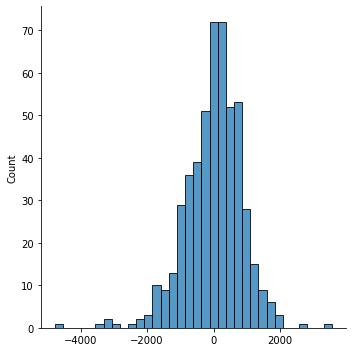

In [226]:
res = y_train - y_train_pred
sns.displot(res)
plt.show()

# Inference on Test data


In [227]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,misty+cloudy,"light snow, rain"
184,0,1,0,33.27085,63.7917,5.459106,6043,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,36.04875,59.2083,7.625404,6211,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [228]:
# list of variables that need to be normalized:
num_vars = ["atemp", "hum", "windspeed"]

# fit and transform on data
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,misty+cloudy,"light snow, rain"
184,0,1,0,0.769660,0.657364,0.084219,6043,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.842587,0.610133,0.153728,6211,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,2659,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,4780,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,4968,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [229]:
y_test = df_test.pop("cnt")
X_test = df_test

In [230]:
# Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,misty+cloudy,"light snow, rain"
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [231]:
# Drop columns that were dropped while training

# column_list = ["hum", "atemp", "holiday", "feb", "jul", "nov", "dec", "tue", "fri", "wed", "thur"]


X_test_sm = X_test_sm.drop(["hum", "atemp", "holiday", "feb", "jul", "nov", "dec", "tue", "fri", "wed", "thur"], axis=1)

In [232]:
X_test_sm

,const,yr,workingday,windspeed,summer,fall,winter,mar,apr,may,jun,aug,sep,oct,mon,sat,misty+cloudy,"light snow, rain"
184,1.0,0,0,0.084219,0,1,0,0,0,0,0,0,0,0,1,0,1,0
535,1.0,1,1,0.153728,1,0,0,0,0,0,1,0,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,1,0,0,0,0,0,0,1,0,0,1,0
221,1.0,0,1,0.339570,0,1,0,0,0,0,0,1,0,0,0,0,0,0
152,1.0,0,1,0.537414,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,1,0.283397,0,0,1,0,0,0,0,0,0,0,0,0,0,0
127,1.0,0,0,0.069510,1,0,0,0,0,1,0,0,0,0,0,0,0,0
640,1.0,1,1,0.052115,0,0,1,0,0,0,0,0,0,1,0,0,1,0
72,1.0,0,1,0.203418,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [233]:
X_test_sm.shape

(220, 18)

In [234]:
# Prediction on Test set
y_test_pred = lr_model.predict(X_test_sm)

In [235]:
from sklearn.metrics import r2_score

In [236]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7963591599469884

In [237]:
lr_model.params

const               1869.927407
yr                  2160.706327
workingday           479.605068
windspeed          -1416.763834
summer              1423.477998
fall                2302.695020
winter              1812.073703
mar                  737.291340
apr                  617.675391
may                 1320.365881
jun                 1247.675309
aug                  648.047265
sep                 1075.193083
oct                  868.725350
mon                 -217.310135
sat                  519.770215
misty+cloudy        -794.795458
light snow, rain   -2683.888999
dtype: float64

# RFE (Recursive feature elimination)

Shortlisting the columns based on RFE.

From previous section we got the r2_score on test data 0.7963

In [238]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [239]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sep', 'oct', 'nov', 'dec', 'mon', 'tue', 'wed', 'thur', 'fri', 'sat',
       'misty+cloudy', 'light snow, rain'],
      dtype='object')

In [240]:
X_train.shape

(510, 28)

In [241]:
y_train

576    7216
426    4066
728    1796
482    4220
111    1683
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 510, dtype: int64

In [136]:
# Running RFE with the output number of variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [243]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', False, 2),
 ('fall', False, 3),
 ('winter', True, 1),
 ('feb', False, 3),
 ('mar', False, 3),
 ('apr', False, 3),
 ('may', False, 2),
 ('jun', False, 2),
 ('jul', False, 3),
 ('aug', False, 2),
 ('sep', True, 1),
 ('oct', False, 3),
 ('nov', False, 3),
 ('dec', False, 3),
 ('mon', True, 1),
 ('tue', True, 1),
 ('wed', True, 1),
 ('thur', True, 1),
 ('fri', True, 1),
 ('sat', False, 3),
 ('misty+cloudy', False, 3),
 ('light snow, rain', True, 1)]

In [244]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'winter',
       'sep', 'mon', 'tue', 'wed', 'thur', 'fri', 'light snow, rain'],
      dtype='object')

In [245]:
X_train.columns[~rfe.support_]

Index(['summer', 'fall', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'oct', 'nov', 'dec', 'sat', 'misty+cloudy'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics


In [246]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [247]:
X_train_rfe

,yr,holiday,workingday,atemp,hum,windspeed,winter,sep,mon,tue,wed,thur,fri,"light snow, rain"
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.824359,0.679690,0.187140,0,0,0,0,0,1,0,0
53,0,0,1,0.218747,0.435939,0.111379,0,0,0,0,1,0,0,0
350,0,0,0,0.223544,0.577930,0.431816,1,0,0,0,0,0,0,0
79,0,0,1,0.434043,0.759870,0.529881,0,0,1,0,0,0,0,0


In [248]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     156.0
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          9.27e-166
Time:                        23:37:46   Log-Likelihood:                -4172.0
No. Observations:                 510   AIC:                             8372.
Df Residuals:                     496   BIC:                             8431.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2203.5595    253.390  

wed is insignificant in presence of other variables. can be dropped

In [249]:
X_train_new = X_train_rfe.drop(["wed"], axis = 1)

In [250]:
# Rebuilding the model without "wed" column

# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     156.0
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          9.27e-166
Time:                        23:37:46   Log-Likelihood:                -4172.0
No. Observations:                 510   AIC:                             8372.
Df Residuals:                     496   BIC:                             8431.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2203.5595    253.390  

In [251]:
X_train_new = X_train_new.drop(["fri"], axis = 1)

# Rebuilding the model without "fri" column

# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     169.4
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          6.97e-167
Time:                        23:37:46   Log-Likelihood:                -4172.0
No. Observations:                 510   AIC:                             8370.
Df Residuals:                     497   BIC:                             8425.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2203.7460    253.095  

In [252]:
X_train_new = X_train_new.drop(["thur"], axis = 1)

# Rebuilding the model without "thur" column

# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          6.06e-168
Time:                        23:37:46   Log-Likelihood:                -4172.2
No. Observations:                 510   AIC:                             8368.
Df Residuals:                     498   BIC:                             8419.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2198.5047    252.797  

In [253]:
X_train_new = X_train_new.drop(["tue"], axis = 1)

# Rebuilding the model without "tue" column

# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          5.96e-169
Time:                        23:37:46   Log-Likelihood:                -4172.5
No. Observations:                 510   AIC:                             8367.
Df Residuals:                     499   BIC:                             8414.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2206.4610    252.558  

In [254]:
X_train_new = X_train_new.drop(["mon"], axis = 1)

# Rebuilding the model without "mon" column

# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     226.1
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          5.67e-170
Time:                        23:37:46   Log-Likelihood:                -4172.9
No. Observations:                 510   AIC:                             8366.
Df Residuals:                     500   BIC:                             8408.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2213.4935    252.377  

In [255]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'winter', 'sep', 'light snow, rain'],
      dtype='object')

In [256]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [257]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,11.04
3,atemp,7.28
5,windspeed,3.52
2,workingday,3.13
0,yr,2.02
6,winter,1.47
7,sep,1.15
8,"light snow, rain",1.09
1,holiday,1.08


##### Residual analysis
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [258]:
# predicting on the training set
# X_train_lm
y_train_pred = lm.predict(X_train_lm)

<ipython-input-259-4a46eced639a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


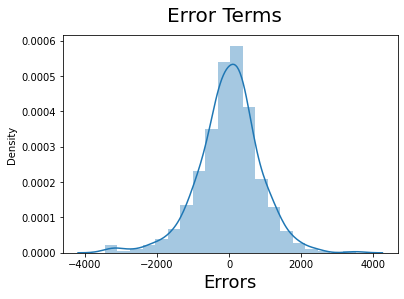

In [259]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

plt.show()

Making predictions on test set



In [260]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [261]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

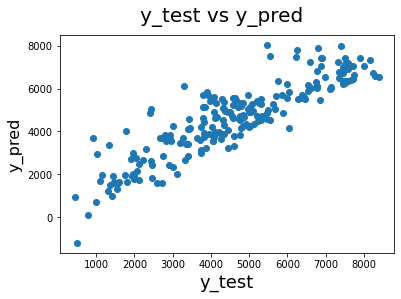

In [262]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [263]:
r2_score(y_true=y_test, y_pred=y_pred)

0.7826787690398889